<a href="https://colab.research.google.com/github/tushitapandey/MTL766/blob/main/MTL766_FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, probplot
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [ ]:
data = pd.read_csv(path+'/heart.csv')
data.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

# Data Info :

In [ ]:
data.shape

(918, 12)

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Clearly the datas are not Multivariate Normally distributed , thus we cannot perform Profile Analysis or the tests done in class to check for equality of mean


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- **No null values** present in the data!

In [ ]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

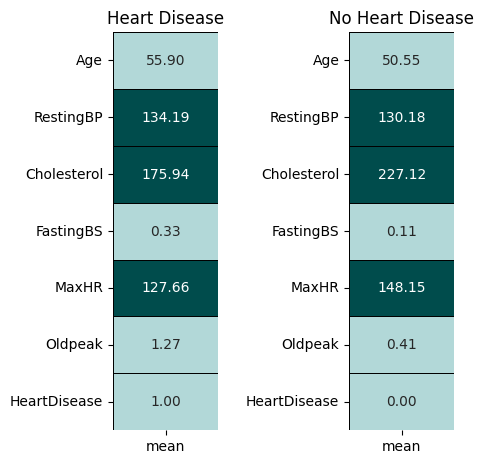

In [ ]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T

colors1 = ['#b2d8d8','#004c4c']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors1,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors1,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

### Dividing features into Numerical and Categorical

In [ ]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.



### Categorical Features to Numerical Values for ease of analysis

In [ ]:

le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

# Multivariate Check

In [ ]:
def univariate_checks(data1):
  num_columns = len(data1.columns)
  fig, axes = plt.subplots(1, num_columns, figsize=(10 * num_columns, 10))

  for i, column in enumerate(data1.columns):
      stats.probplot(data1[column], dist="norm", plot=axes[i])
      axes[i].set_title(f'Q-Q Plot for {column}')
      axes[i].set_xlabel('Theoretical Quantiles')
      axes[i].set_ylabel('Sample Quantiles')
      axes[i].grid()

  plt.tight_layout()  # Adjust layout to prevent overlap
  plt.show()

In [ ]:
def QQPlot(data1,ordered_distances, threshold):
    #Calculate chi-squared quantiles
    n = len(ordered_distances)
    proportions = (np.arange(1, n + 1) - 0.5) / n
    chi_squared_quantiles = chi2.ppf(proportions, df=data1.shape[1])
    # print(chi_squared_quantiles)
    # Graph the pairs (qc(j - 1/n), d[j])
    plt.figure(figsize=(10, 6))
    plt.plot(chi_squared_quantiles, ordered_distances, marker='o', linestyle='none')
    plt.title('Comparison of Ordered Squared Mahalanobis Distances and Chi-Squared Quantiles')
    plt.xlabel('Chi-Squared Quantiles')
    plt.ylabel('Ordered Squared Distances')
    plt.grid()
    plt.axline((0, 0), slope=1, color='red', linestyle='--')  # 45-degree line for reference
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()

In [ ]:
def mvn_check(data):
    mean = data.mean().values
    S = data.cov().values
    S_inv = np.linalg.inv(S)
    squared_distances = squared_mahalanobis_distances(data.values, mean, S_inv)
    QQPlot(data,np.sort(squared_distances),100)
    univariate_checks(data)

In [ ]:
def squared_mahalanobis_distances(X, mean, inv_cov):
    distances = np.array([((x - mean).T @ inv_cov @ (x - mean)) for x in X])
    return distances

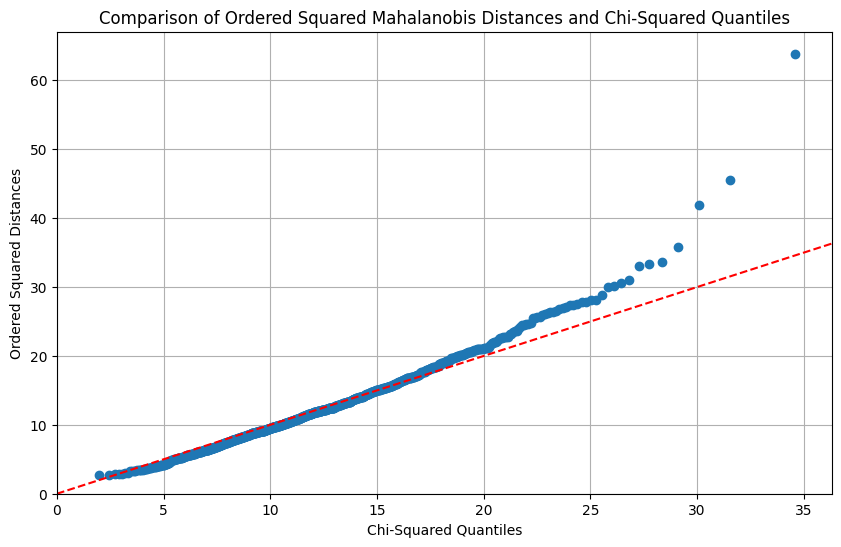

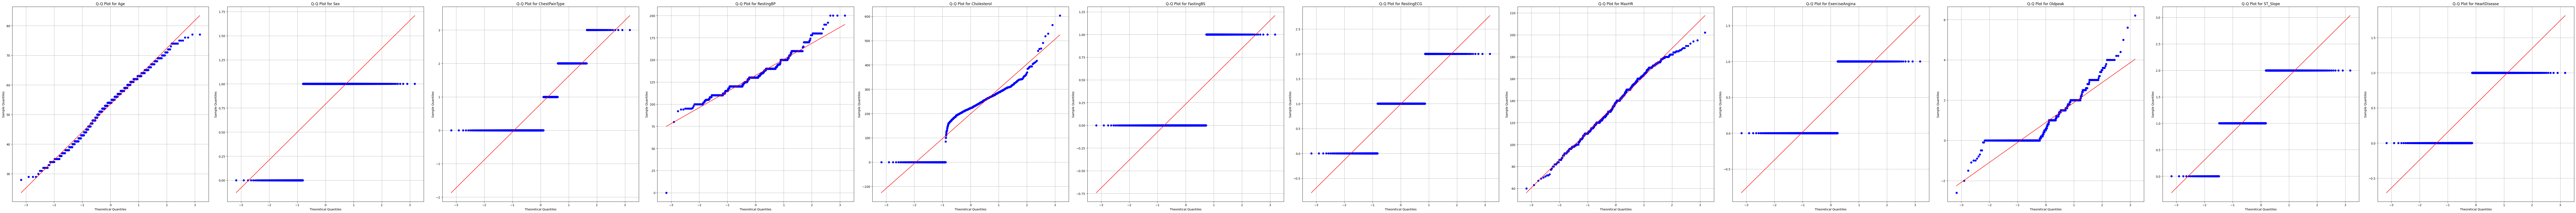

In [ ]:
mvn_check(df1)

With the categorical variables, clearly the data does not follow MVN distribution, we now try to use only numerical variables to try to check the same

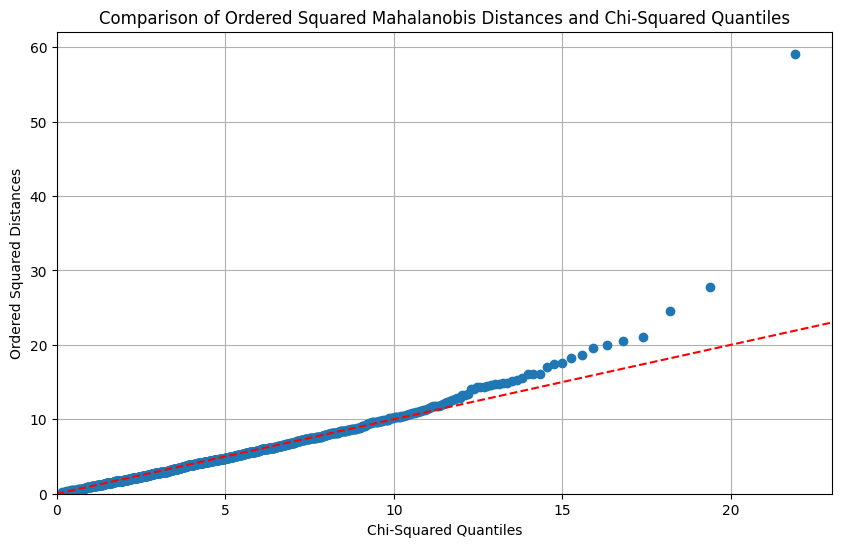

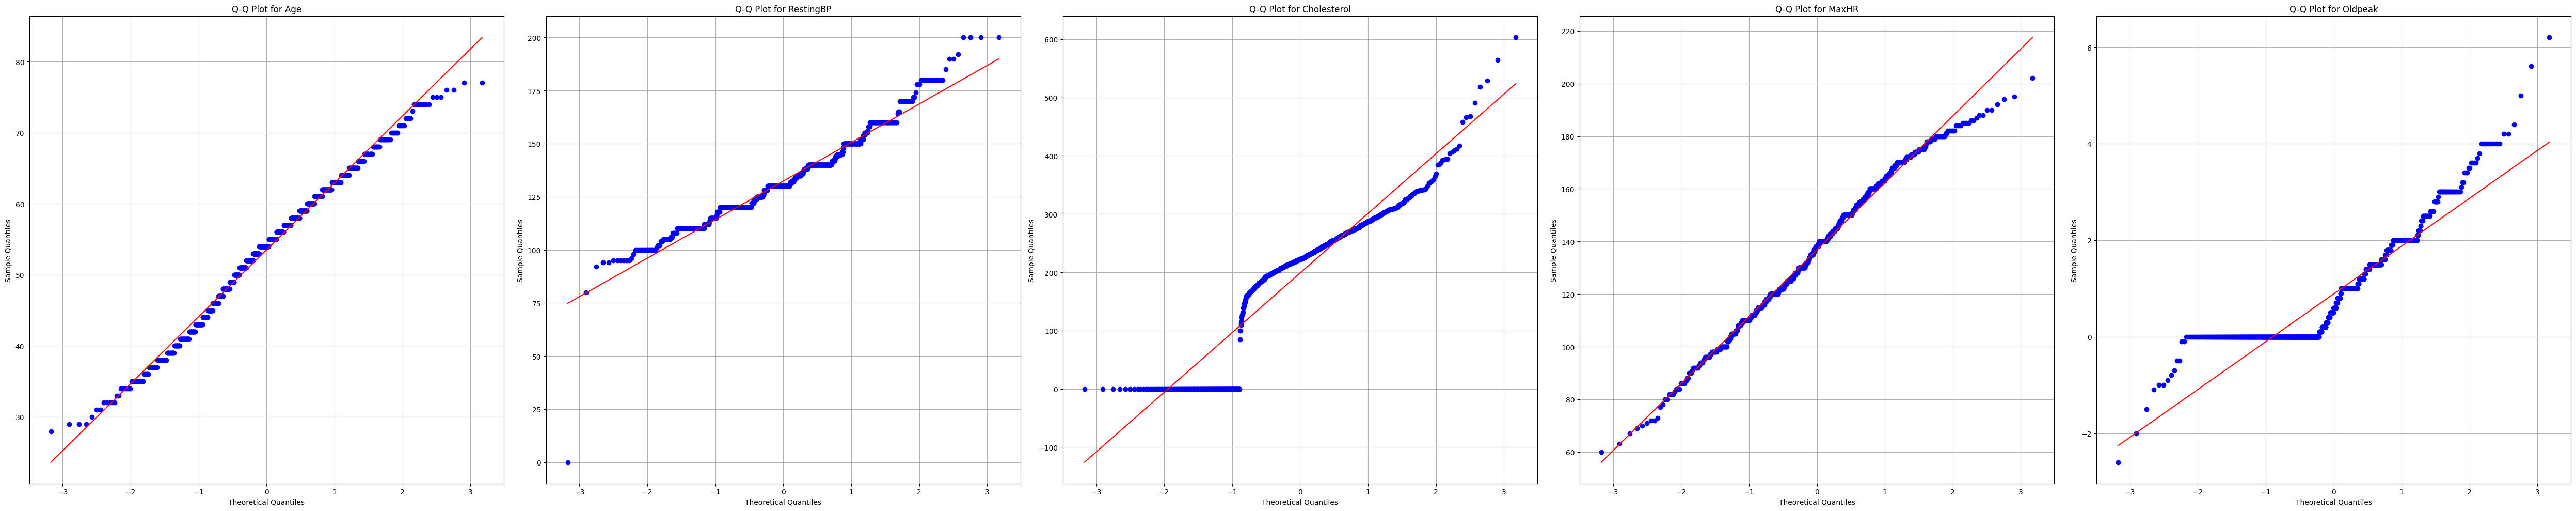

In [ ]:
mvn_check( df1.drop(columns = categorical_features, axis = 1))

The fit improves a little but we still cannot claim that the data is multivariate normal, these plots also match with our hypothesis after seeing the histograms where-in age was inferred to be normally distributed

# Exploratory Data Analysis

### Numerical Features :

#### Distribution of Numerical Features :

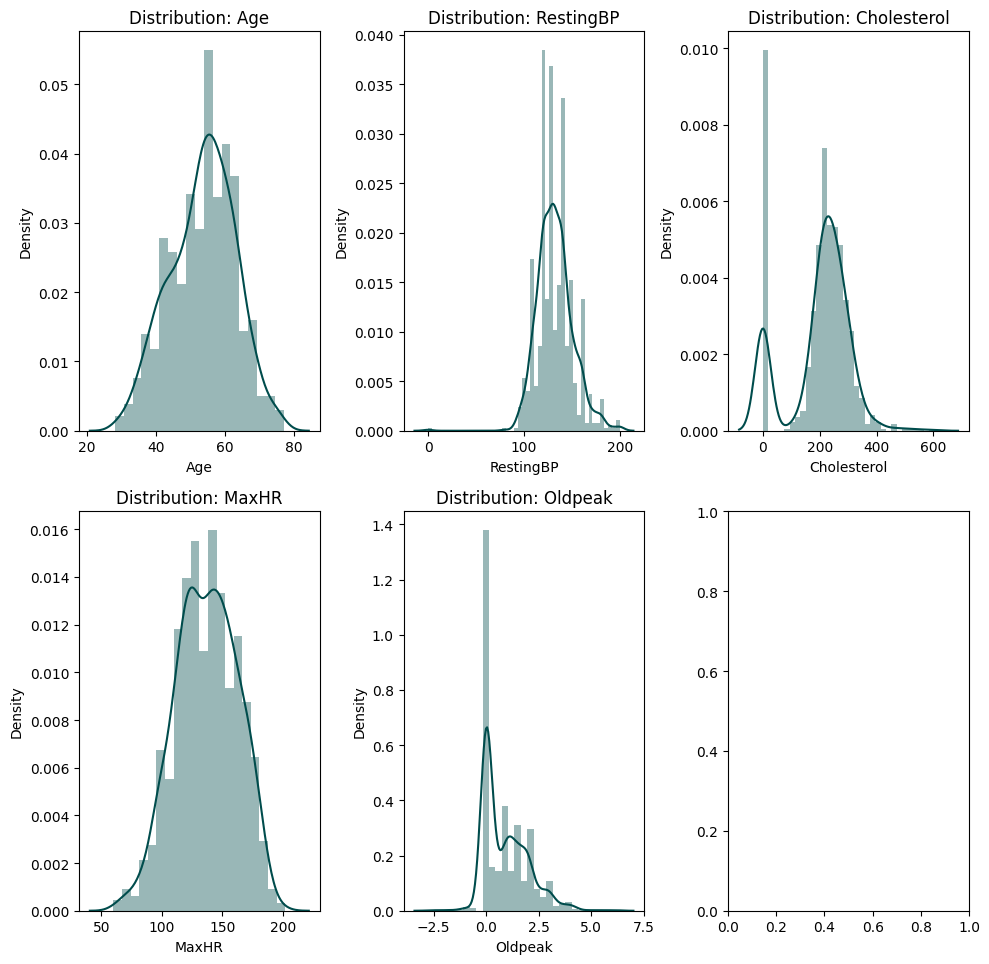

In [ ]:
num_features = len(numerical_features)
nrows = 2
ncols = 3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 9.75))

for i in range(num_features):
    plt.subplot(nrows, ncols, i + 1)
    sns.distplot(data[numerical_features[i]], color=colors1[1])
    plt.title(f'Distribution: {numerical_features[i]}')
plt.tight_layout()
plt.show()

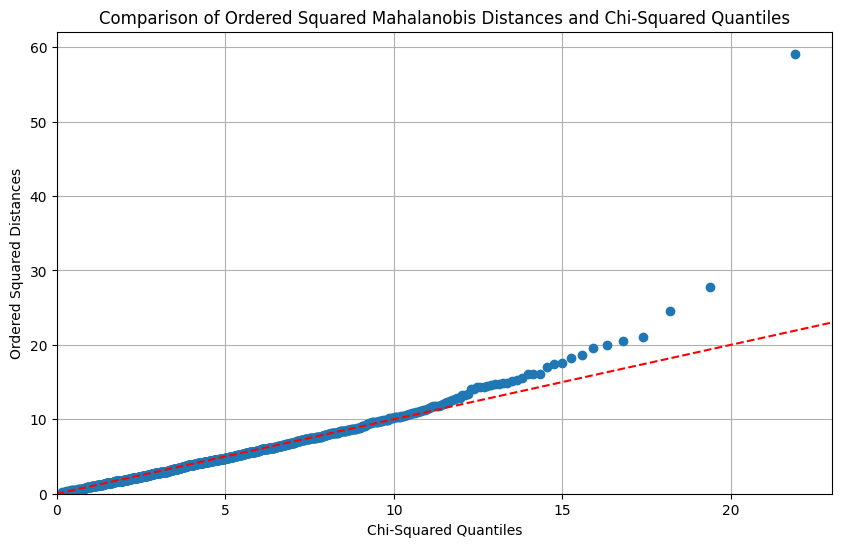

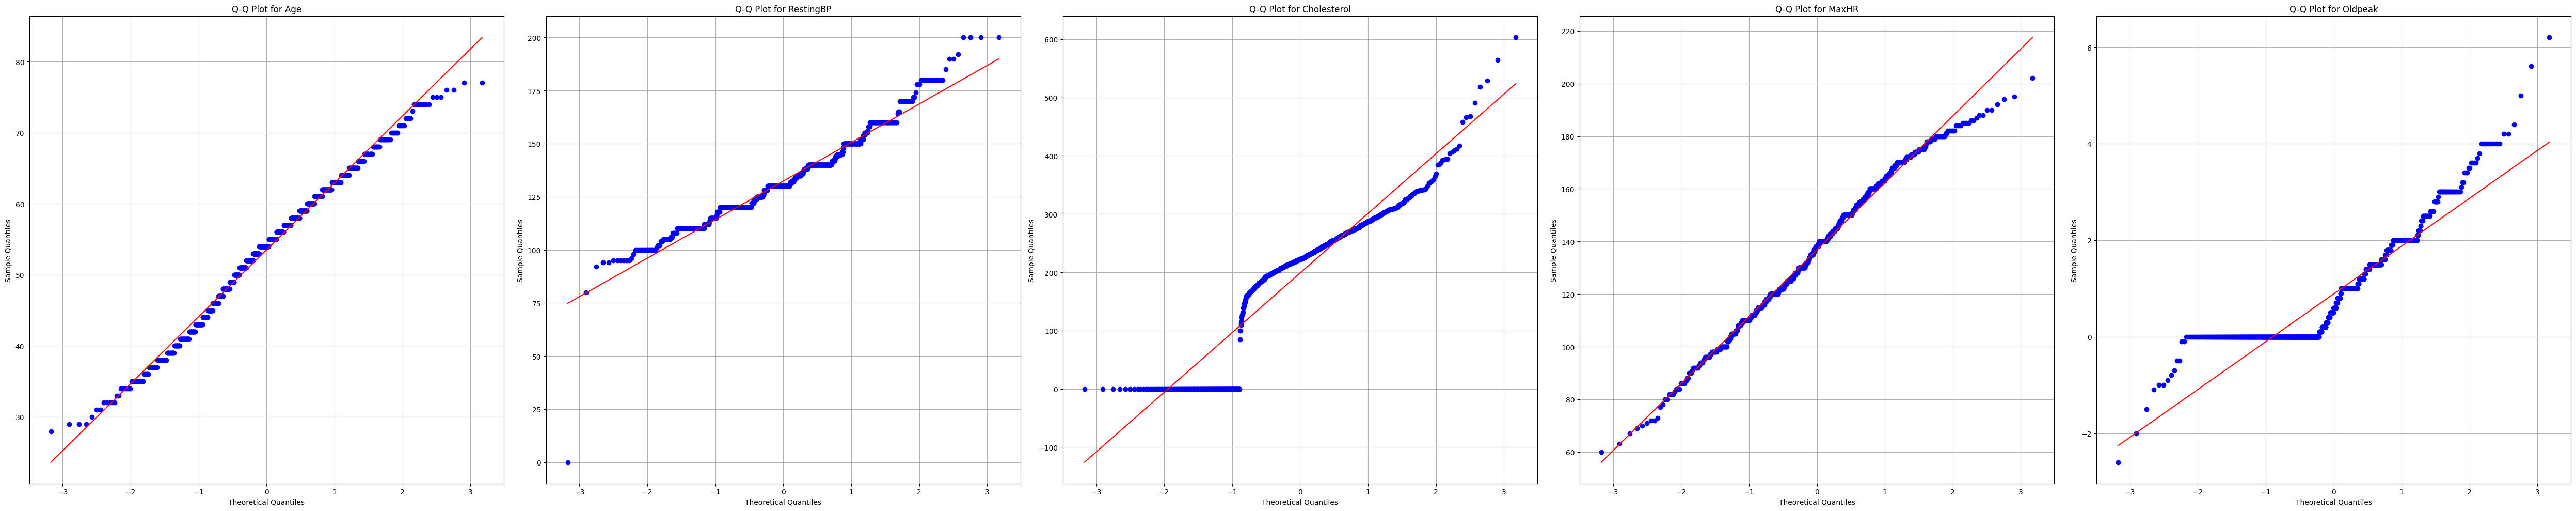

In [ ]:
mvn_check(df1.drop(categorical_features,axis = 1))

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution.
- **Age** has a a almost perfect normal data distribution.
- **MaxHR** has a close to normal data distribution.
But clearly, the data jointly, does not have multivariate normal distribution

### Target Variable Visualization (HeartDisease) :

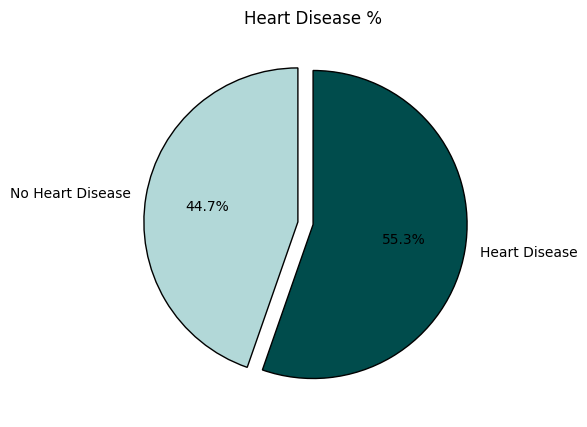

In [ ]:

l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors1,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

plt.show()

- The dataset is pretty much evenly balanced between the positive and negati ve heart disease cases, thus if we apply models to predict the probabilty of a person getting a heart disease, we will not face  sampling bias


### Categorical Features vs Target Variable (HeartDisease) :

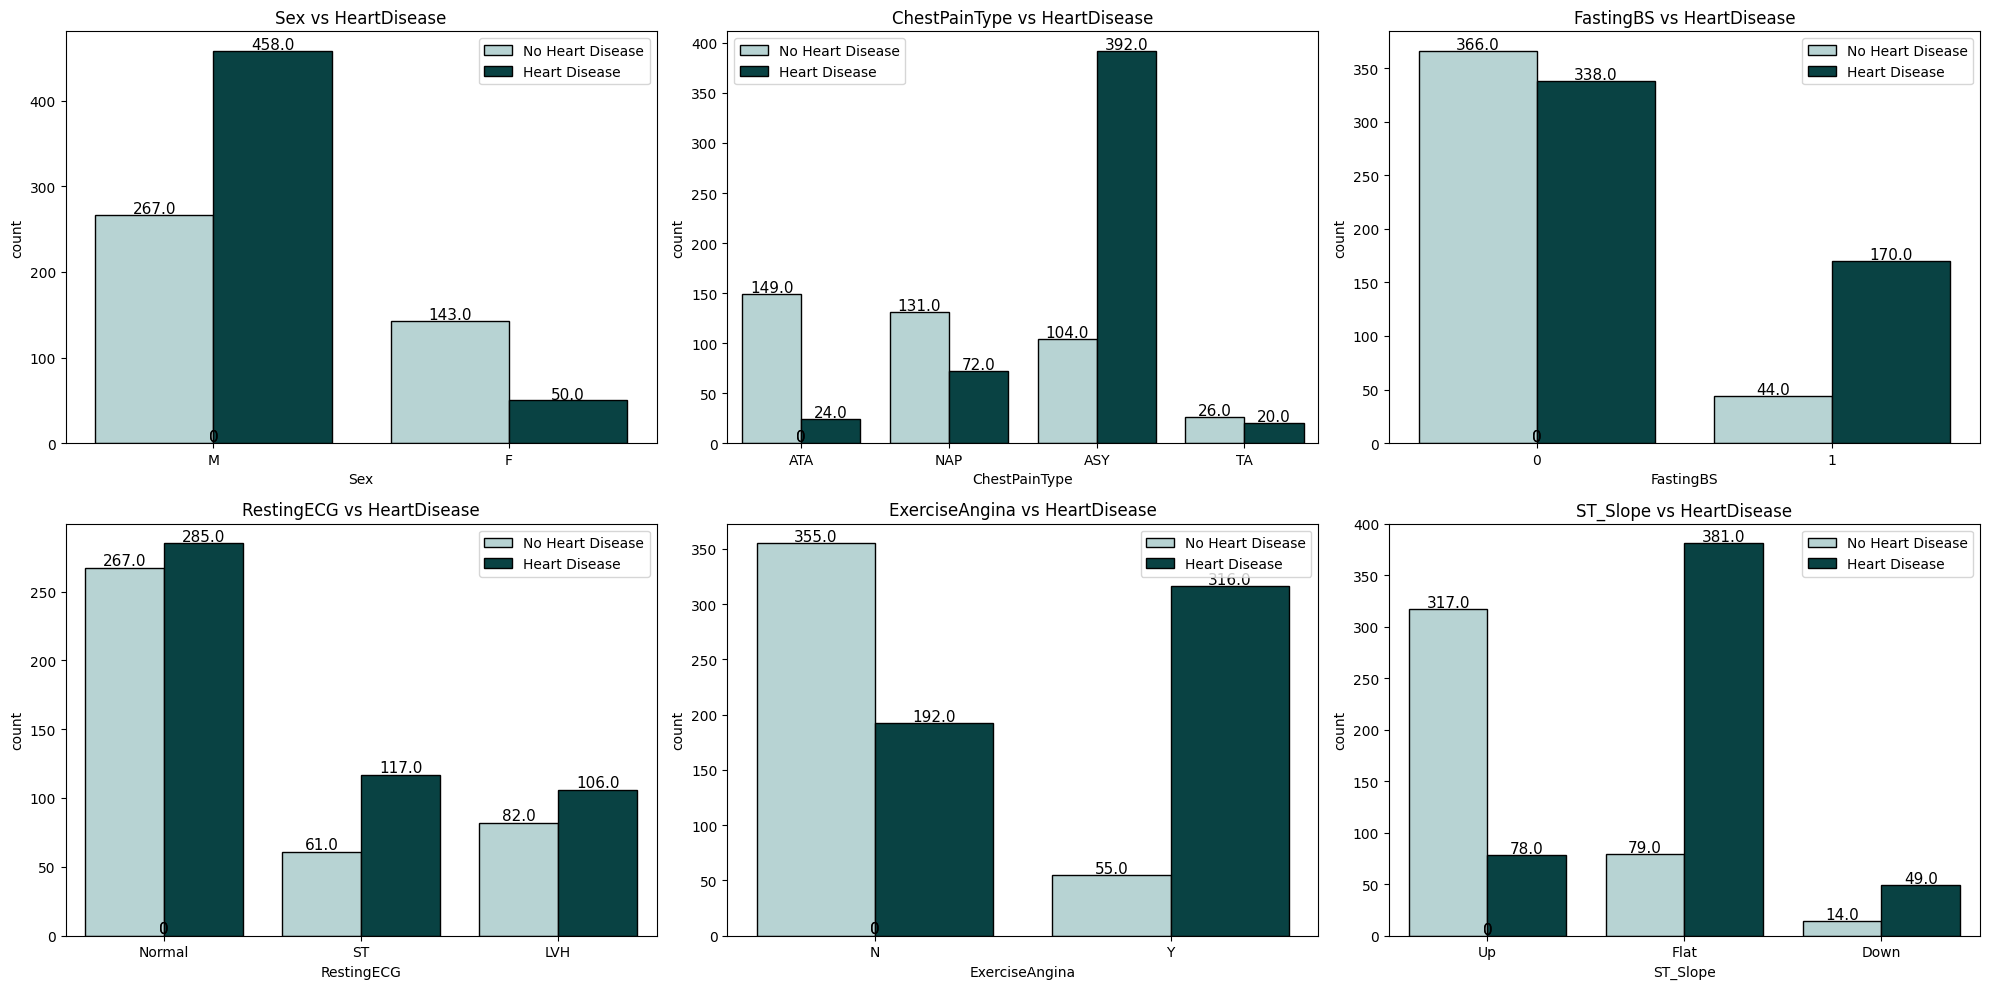

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
for i in range(len(categorical_features) - 1):
    sns_plot = sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease",
                             palette=colors1, edgecolor='black', ax=ax[i // 3, i % 3])
    for rect in sns_plot.patches:
        sns_plot.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2,
                      rect.get_height(), horizontalalignment='center', fontsize=11)
    ax[i // 3, i % 3].set_title(categorical_features[i] + ' vs HeartDisease')
    ax[i // 3, i % 3].legend(['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()


- **Male** population has more heart disease patients than no heart disease patients. In the case of **Female** population, heart disease patients are less than no heart disease patients.
- **ASY** type of chest pain boldly points towards major chances of heart disease.
- **Fasting Blood Sugar** is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
- **RestingECG** does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
- **Exercise Induced Engina** definitely bumps the probability of being diagnosed with heart diseases.
- With the **ST_Slope** values, **flat** slope displays a very high probability of being diagnosed with heart disease. **Down** also shows the same output but in very few data points.

### Categorical Features vs Positive Heart Disease Cases :

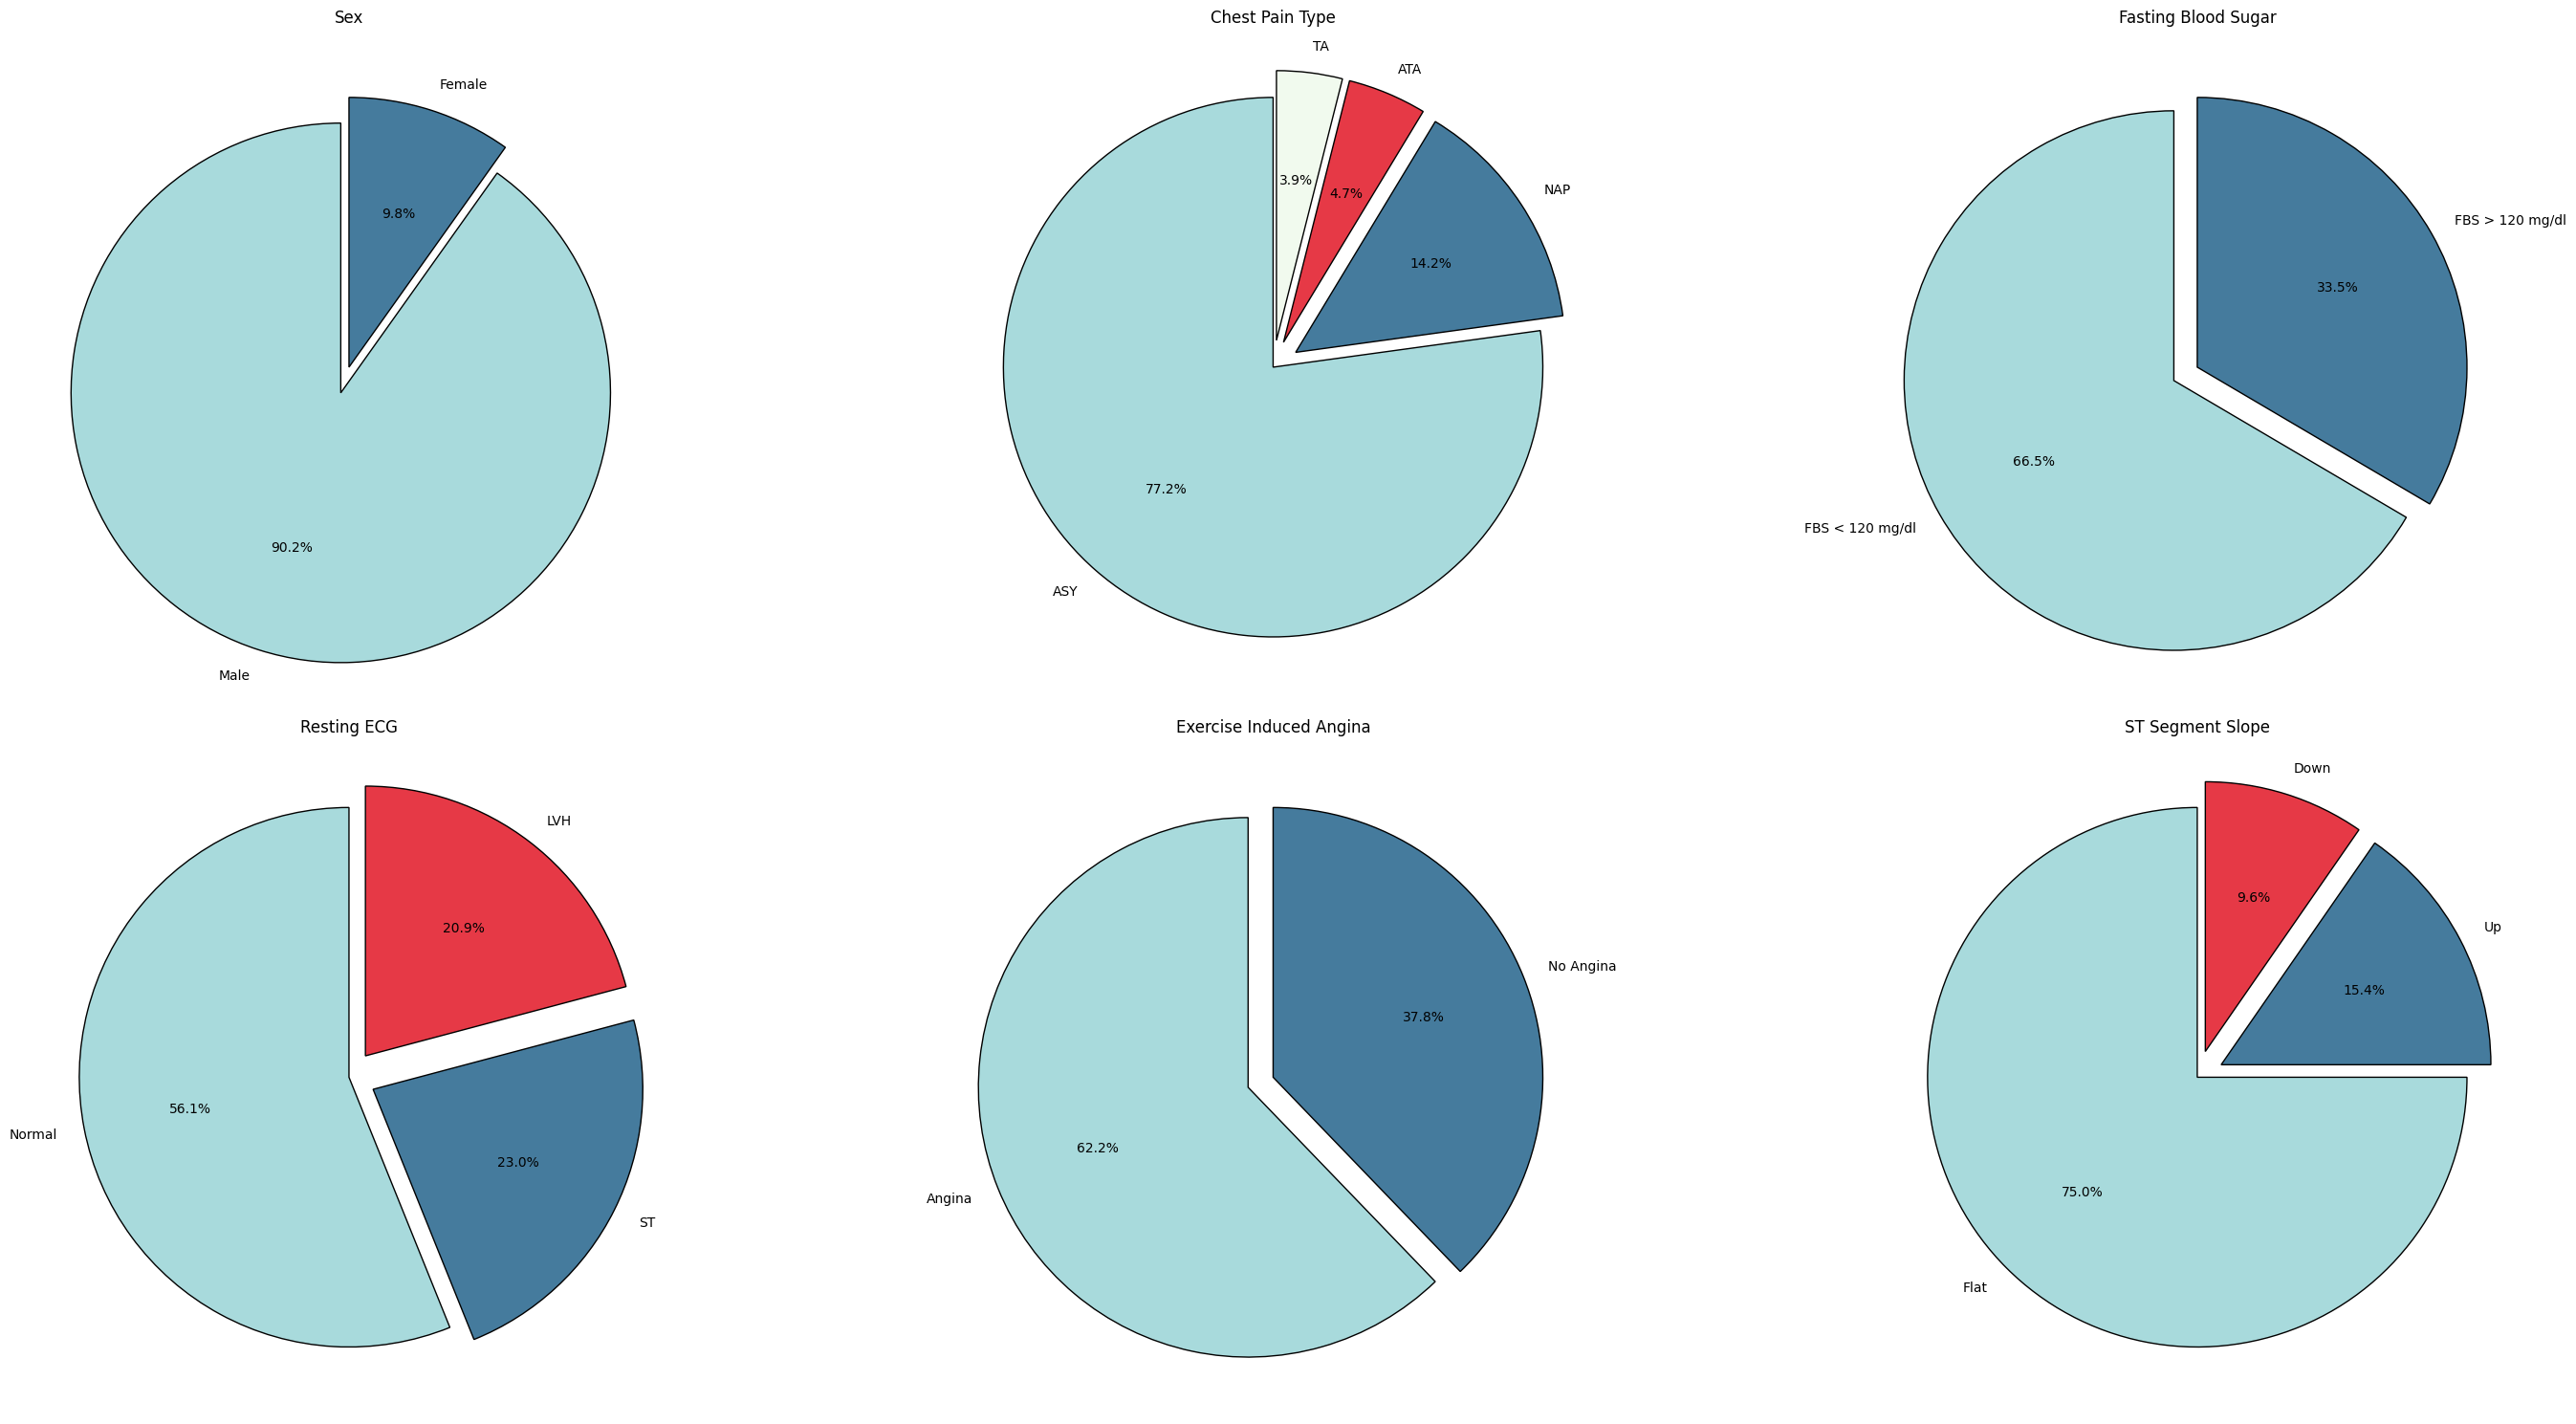

In [ ]:


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
colors = ['#A8DADC', '#457B9D', '#E63946', '#F1FAEE']


sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]
ax[0, 0].pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
             colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0, 0].set_title('Sex')


cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]
ax[0, 1].pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, colors=colors,
             explode=(0, 0.1, 0.1, 0.1), wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0, 1].set_title('Chest Pain Type')


fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]
ax[0, 2].pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90,
             explode=(0.1, 0), colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0, 2].set_title('Fasting Blood Sugar')

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]
ax[1, 2].pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, colors=colors,
             explode=(0, 0.1, 0.1), wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1, 2].set_title('ST Segment Slope')


exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]
ax[1, 1].pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
             colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1, 1].set_title('Exercise Induced Angina')

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]
ax[1, 0].pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, colors=colors,
             explode=(0, 0.1, 0.1), wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1, 0].set_title('Resting ECG')

ax[1, 2].axis('off')
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()


Chest Pain Type: The ASY (Asymptomatic) chest pain type is most common, appearing in 77% of heart disease cases, marking it as a critical indicator.

Sex: A remarkable 90% of heart disease patients are male, which can be pointing to a higher prevalence of heart disease among men, but in the dataset, the number of women participants is muchh lower than men, thus we cannot make this hypothesis right now

ST Segment Slope: Flat slope readings constitute 75% of cases, making it a significant marker for underlying heart issues.

Resting ECG: Patients with a Normal ECG level account for 56% of heart disease cases, more frequently than those with LVH or ST abnormalities.

Exercise-Induced Angina: The presence of angina induced by exercise strongly correlates with a higher likelihood of heart disease.

Fasting Blood Sugar: Heart disease is more common in patients with fasting blood sugar levels below 120 mg/dl, suggesting an association with glucose regulation.

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

- For **age** 50+, **RestingBP** between 100 - 175, **Cholesterol** level of 200 - 300,**Max Heart Rate** below 160 and positive **oldpeak** values displays high cases of heart disease.
- For **RestingBP** values 100 - 175, highlights too many heart disease patients for all the features.
- **Cholesterol** values 200 - 300 dominates the heart disease cases.
- Similarly, **Max Heart Rate** values below 140 has high probability of being diagnosed with heart diseases.

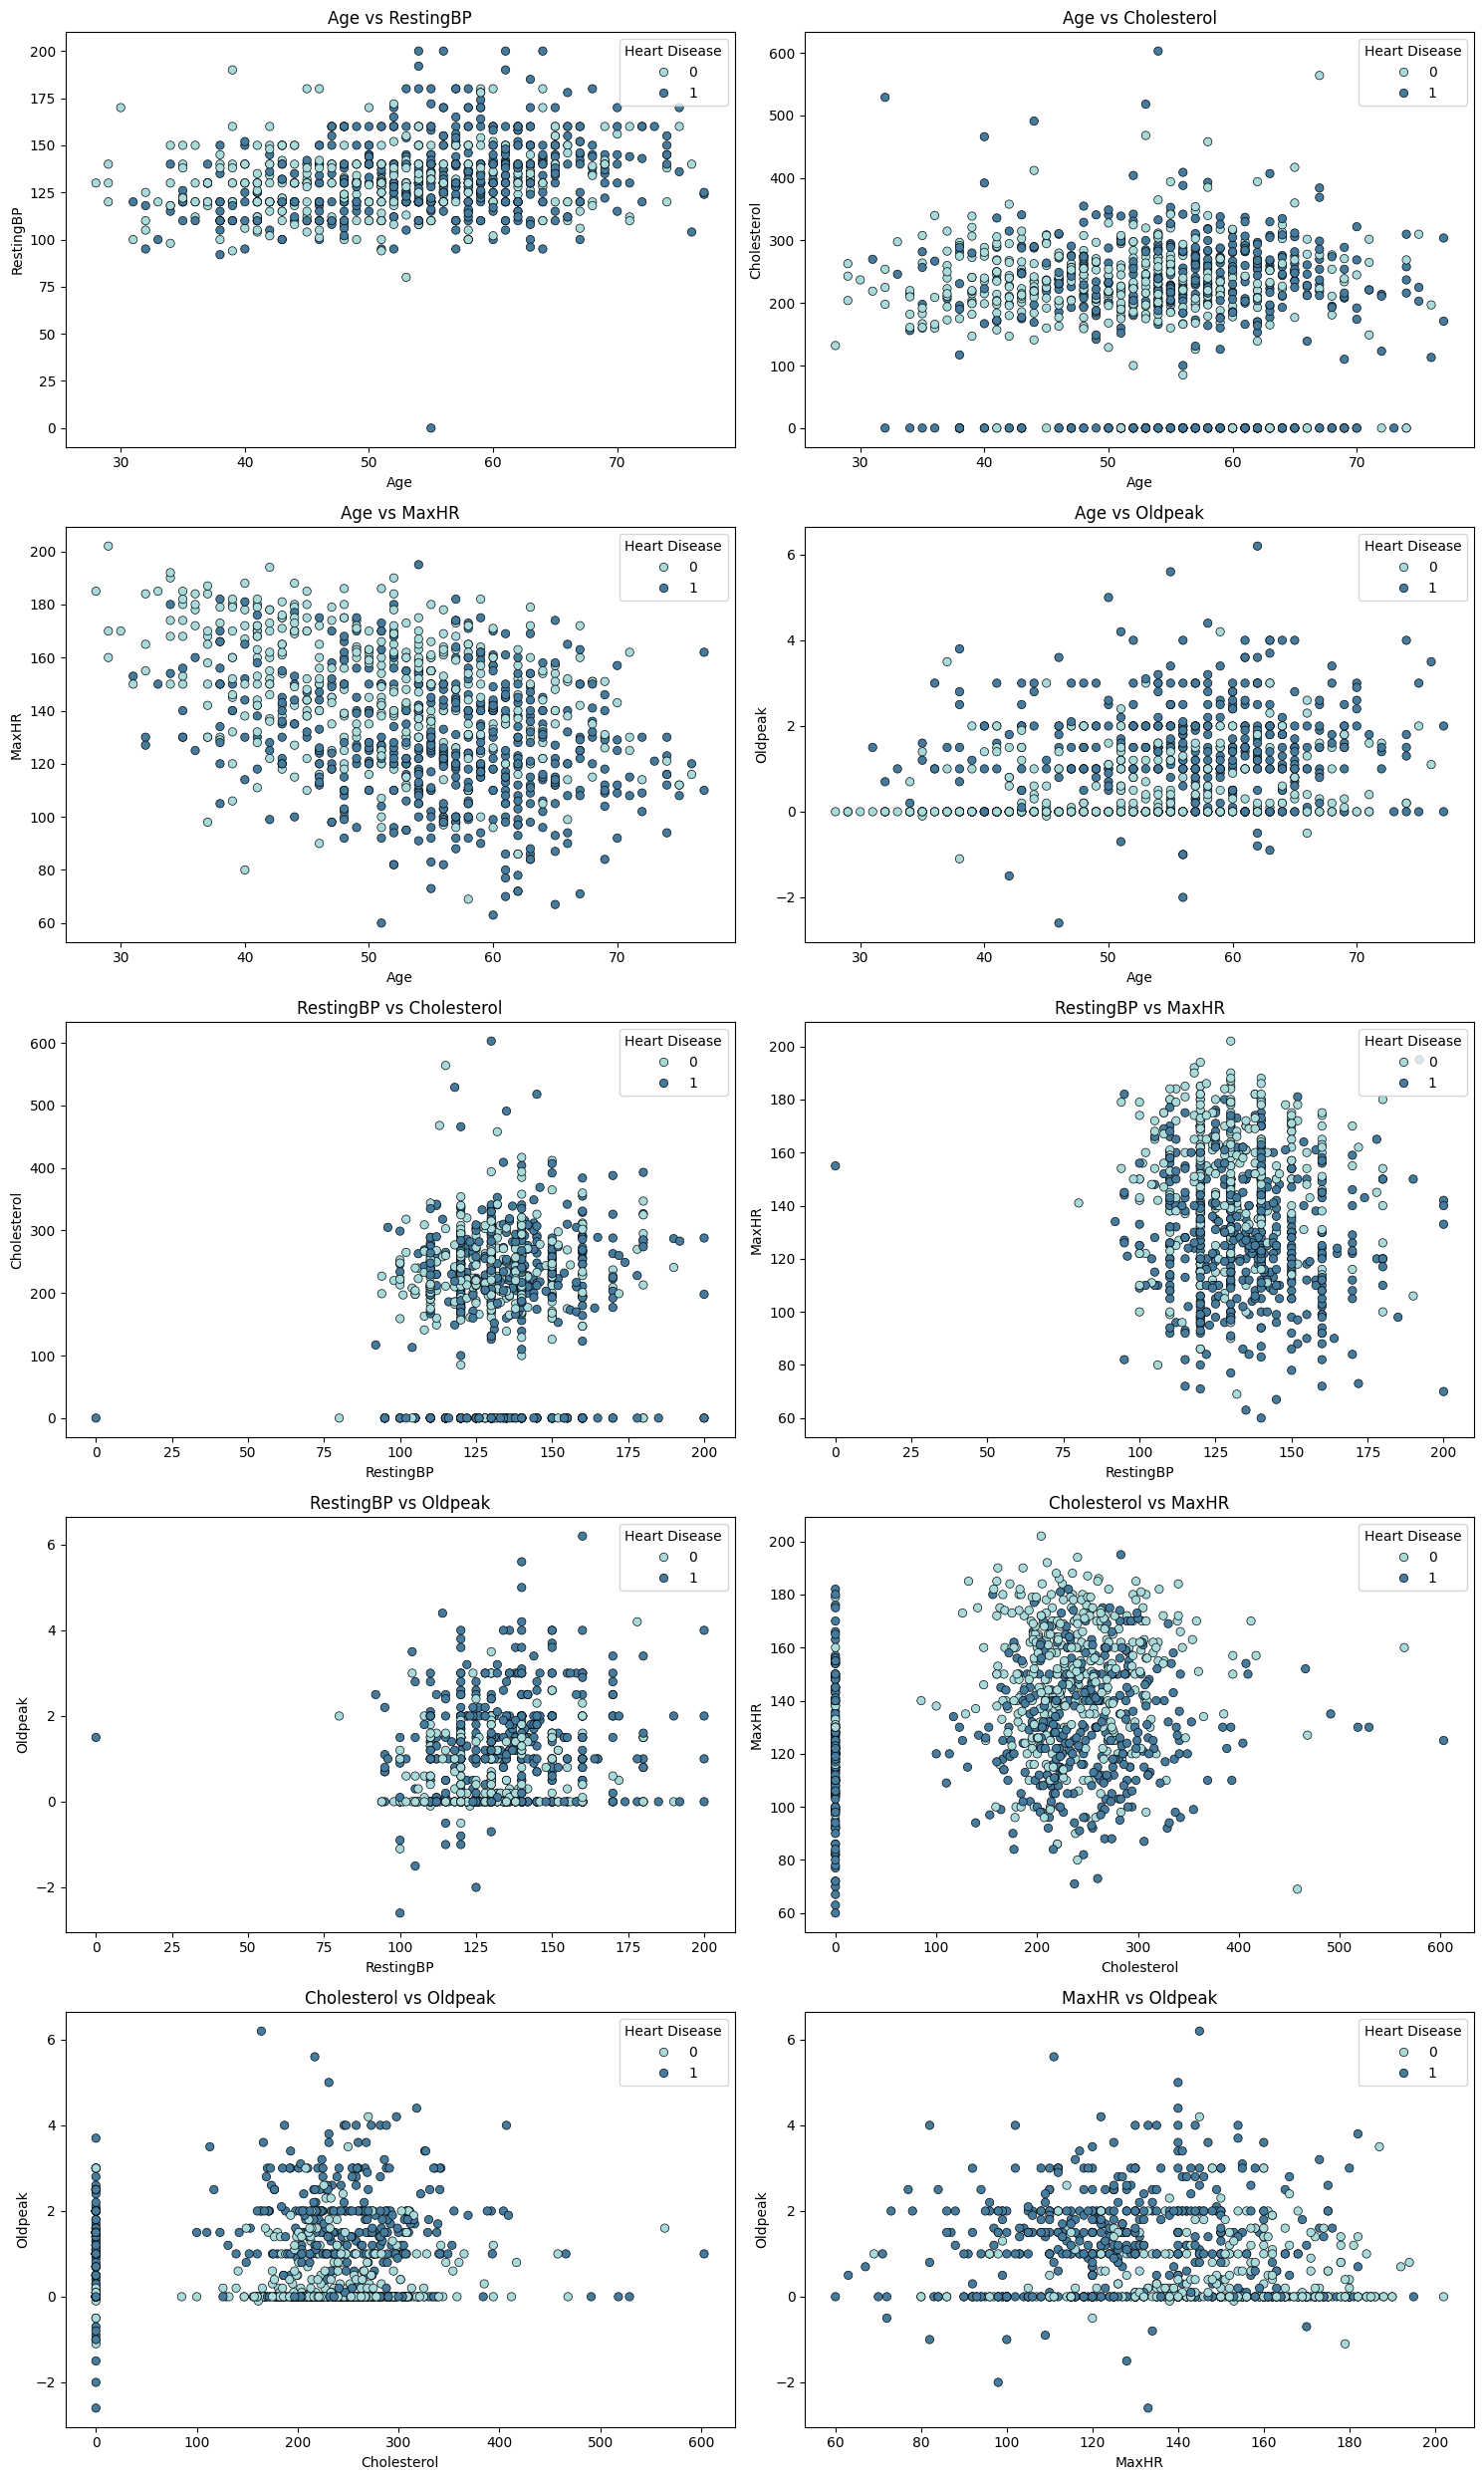

In [ ]:

colors = ['#A8DADC', '#457B9D']

a = 0
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5, 2, a)
            sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=data, hue='HeartDisease',
                            palette=colors, edgecolor='black')
            plt.legend(title='Heart Disease', loc='upper right')
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

plt.tight_layout()
plt.show()

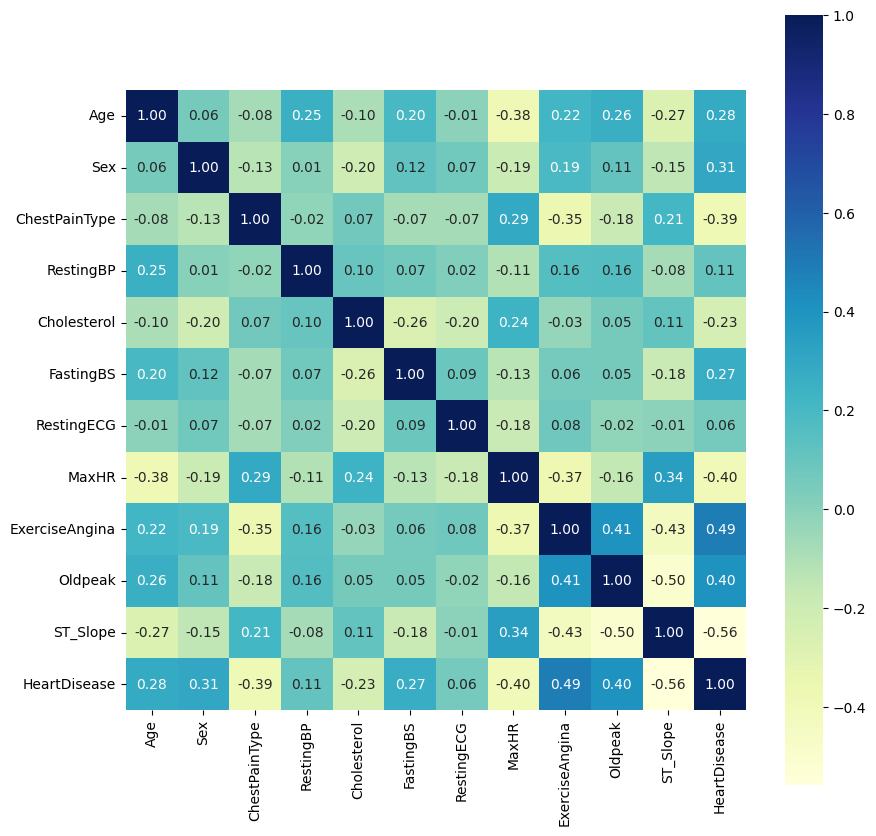

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="YlGnBu", square=True);

**Heart Disease Correlations:**

ST_Slope has a significant negative correlation with HeartDisease (-0.56). This suggests that as ST_Slope decreases, the likelihood of heart disease increases.
ExerciseAngina also has a relatively strong positive correlation with HeartDisease (0.49), indicating that patients with exercise-induced angina are more likely to have heart disease.
Oldpeak shows a positive correlation (0.40), meaning higher values of Oldpeak (ST depression induced by exercise) are associated with a greater likelihood of heart disease.

Age has a moderate positive correlation with HeartDisease (0.28), suggesting that older age slightly increases the likelihood of heart disease.
MaxHR (maximum heart rate achieved) has a notable negative correlation with HeartDisease (-0.40), indicating that lower max heart rates are associated with a higher chance of heart disease.


**Correlations Between Features:**

MaxHR and Age have a moderately negative correlation (-0.38), which makes sense as maximum heart rate generally decreases with age.
ST_Slope and Oldpeak show a strong negative correlation (-0.50), suggesting that as ST_Slope decreases, Oldpeak tends to increase, potentially indicating a relationship between ST depression and the slope of the ST segment during exercise.
Insights for Modeling:

Variables like ST_Slope, ExerciseAngina, Oldpeak, MaxHR, and Age could be significant predictors in a model aimed at predicting heart disease.
Variables with low correlation to HeartDisease (e.g., Cholesterol and RestingBP) may not contribute significantly to predicting heart disease and could potentially be excluded or assigned less weight.


## Summary

**Data Distributions:**


Collectively, the data does not exhibit a multivariate normal distribution, thus we do not perform Profile analysis or Manova by dividing the data into two datasets depending on the presence of heart disease. The variables are also correlated, and thus Manova would not give good values

**Class Balance:**

The dataset is evenly balanced between positive and negative heart disease cases, meaning prediction models should not face sampling bias issues.
Sex-Based Heart Disease Trends:

Males: More likely to have heart disease across various numerical ranges, especially over age 50, with oldpeak values above zero, and max heart rates below 140.
Females: Limited representation in the dataset makes it difficult to conclude specific trends, though they generally exhibit fewer heart disease cases than males.
**Feature-Specific Heart Disease Indicators:**

Chest Pain (ASY Type): Asymptomatic (ASY) chest pain is notably indicative, being present in 77% of heart disease cases.
Exercise-Induced Angina: Strong correlation with heart disease, consistently evident across numerical features.
ST Segment Slope: Flat and down slopes display the highest likelihood of heart disease, with flat being especially prominent.
Resting ECG: Heart disease cases are frequent among patients with normal ECG levels, followed by those with ST and LVH readings.
Fasting Blood Sugar: Both high and low fasting blood sugar levels appear in heart disease cases, but higher cases are observed in patients with levels under 120 mg/dl.


**Combined Feature Observations:**

Age and Fasting Blood Sugar: Heart disease cases persist above age 50, regardless of fasting blood sugar status.
Cholesterol and Fasting Blood Sugar: No clear pattern emerges here for heart disease risk.
Resting BP and ECG: Heart disease is present across varying blood pressure levels and ECG types, notably with cholesterol levels between 200-300 and ST ECG type.
Maximum Heart Rate and ECG: Cases are dense below a maximum heart rate of 140, particularly with normal ECG values.
Clear Positive Correlations:

Exercise-Induced Angina and Heart Disease: Strong positive relationship, with angina during exercise significantly increasing heart disease probability.
ST Slope and Heart Disease: Flat slopes indicate a high likelihood, followed by down slopes, while up slopes show the lowest heart disease probability
    
    

# Data Scaling


We scale the data to ensure that features with varying units and ranges—such as Age (in years) and Fasting Blood Sugar (in mg/dL)—are treated consistently by the model. This prevents any feature from dominating due to its magnitude alone.

We use Normalization to scale features like Oldpeak, which has a right-skewed distribution, to a 0–1 range. This keeps it from overwhelming other features with smaller ranges.

For features that follow a more normal distribution, such as Age, Resting Blood Pressure (RestingBP), Cholesterol, and Max Heart Rate (MaxHR), we apply Standardization to set their mean to 0 and standard deviation to 1. This approach helps these features contribute evenly without disproportionate influence.

By scaling in this way, we achieve a more balanced feature space, enhancing model performance and ensuring fair contributions from each feature in predicting heart disease accurately.

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

# PCA

In [ ]:
X = df1[df1.columns.drop(['HeartDisease'])]
y = df1['HeartDisease']

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': cumulative_variance
})

print("Explained Variance by Principal Component:")
print(explained_variance_df)

Explained Variance by Principal Component:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                      0.29                 0.29
1                  PC2                      0.19                 0.47
2                  PC3                      0.14                 0.62
3                  PC4                      0.11                 0.73
4                  PC5                      0.09                 0.82
5                  PC6                      0.06                 0.88
6                  PC7                      0.05                 0.93
7                  PC8                      0.03                 0.95
8                  PC9                      0.03                 0.98
9                 PC10                      0.02                 1.00
10                PC11                      0.00                 1.00


In [ ]:

feature_names = X.columns

# Relationship of each feature with each principal component
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(explained_variance))], index=feature_names)

print("PCA Component Loadings (Feature Contributions to Principal Components):")
print(loadings)

PCA Component Loadings (Feature Contributions to Principal Components):
                 PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  \
Age            -0.52  0.30  0.30 -0.51  0.48  0.23  0.04 -0.07 -0.02 -0.04   
Sex            -0.07 -0.06 -0.00  0.04 -0.02 -0.07 -0.09 -0.32  0.76 -0.55   
ChestPainType   0.34  0.18  0.76 -0.24 -0.42 -0.11 -0.14 -0.07  0.04  0.07   
RestingBP      -0.26  0.69  0.13  0.66 -0.06 -0.07  0.05  0.02 -0.03 -0.04   
Cholesterol     0.29  0.61 -0.52 -0.42 -0.23  0.13 -0.08  0.08  0.12 -0.01   
FastingBS      -0.09 -0.04  0.08  0.04  0.09 -0.01 -0.12  0.65  0.57  0.46   
RestingECG     -0.09 -0.12  0.04  0.17 -0.24  0.83 -0.44  0.01 -0.05 -0.05   
MaxHR           0.61  0.12  0.09  0.19  0.69  0.08 -0.30 -0.09  0.01  0.00   
ExerciseAngina -0.18  0.02 -0.15  0.01 -0.04 -0.15 -0.33 -0.62  0.13  0.64   
Oldpeak        -0.03  0.02 -0.02 -0.01  0.01 -0.04 -0.08 -0.03 -0.01  0.00   
ST_Slope        0.22  0.01  0.07  0.08  0.01  0.43  0.74 -0.25  0.24  

**Component Contributions:**
PC1: This component seems to be heavily influenced by MaxHR (-0.61) and Age (-0.52). These features might indicate that older individuals with lower maximum heart rates tend to vary together in this dataset.
PC2: Influenced significantly by RestingBP (0.69) and Cholesterol (0.61),  suggesting these features correlate positively in the dataset. High values in these features may indicate higher cardiovascular risk.

PC3: The feature ChestPainType has a strong positive contribution (0.76), which could indicate that different types of chest pain are significant in differentiating this component from others.


# Visualising accross the components


In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [ ]:

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(5)])
pca_df['target'] = y  # Add the target variable


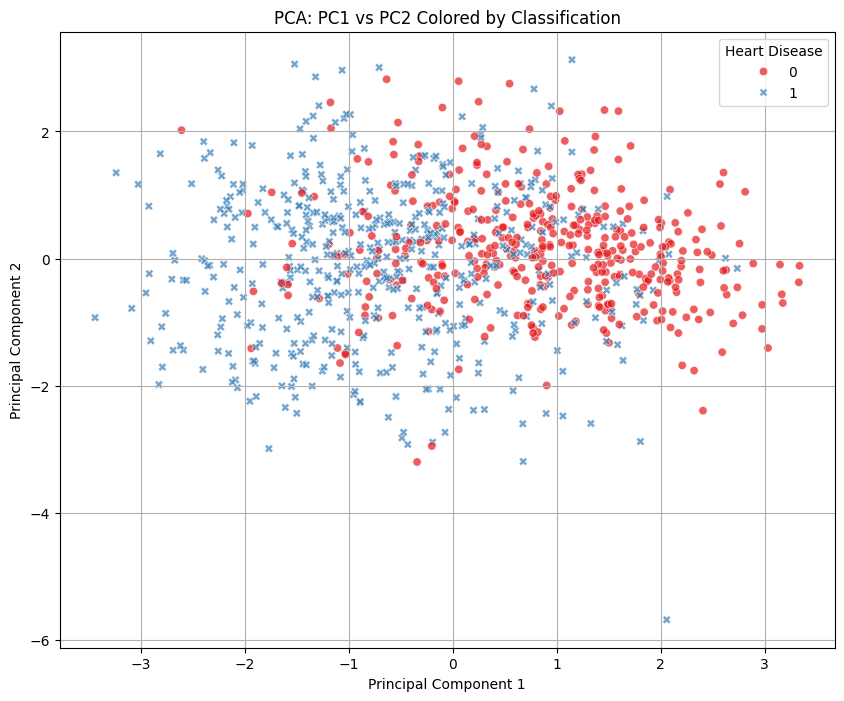

In [ ]:

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['target'] = y  # Add target variable for coloring

# 2D scatter plot for PC1 and PC2
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', alpha=0.7, style='target')
plt.title('PCA: PC1 vs PC2 Colored by Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='upper right')
plt.grid()
plt.show()


There is no clear, linear boundary that perfectly separates the two classes, suggesting that distinguishing between the presence and absence of heart disease using just these two components is not possible

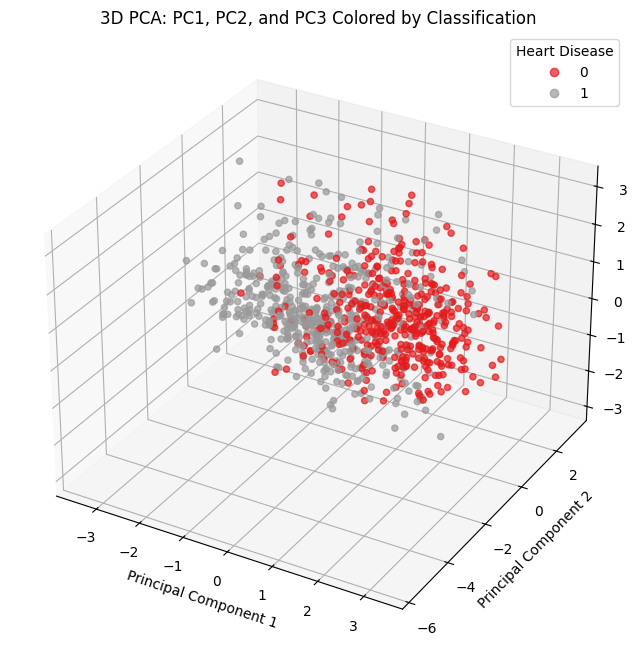

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['target'], cmap='Set1', alpha=0.7)

ax.set_title('3D PCA: PC1, PC2, and PC3 Colored by Classification')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Heart Disease")
plt.show()


While 3D PCA provides a richer visualization, the overlap still suggests that more complex modeling techniques (e.g., nonlinear classifiers or additional features) might be necessary for effective classification.

# Modeling

PCA tells us that non-linear classification models will perform better, let us work on that assumption


In [ ]:
features = df1[df1.columns.drop(['HeartDisease'])].values
target = df1['HeartDisease'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

Tuning KNN...
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}
Best Cross-Validation ROC AUC Score for KNN: 92.68%


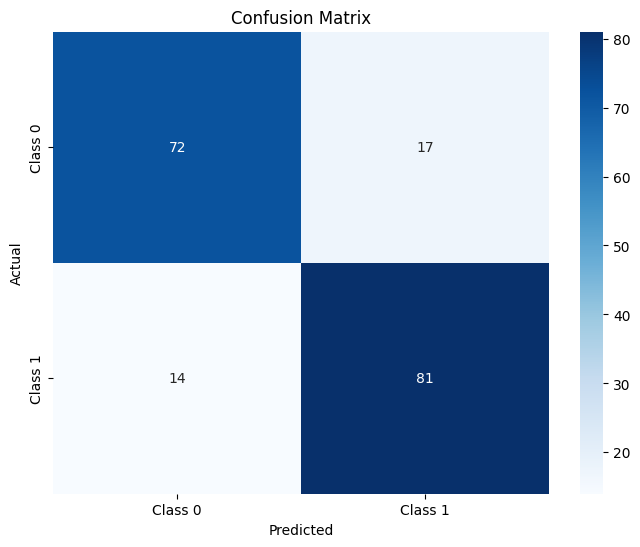

Accuracy: 83.15%
Cross-Validation ROC AUC Score: 92.90%
ROC AUC Score: 83.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82        89
           1       0.83      0.85      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation ROC AUC Score for Random Forest: 93.18%


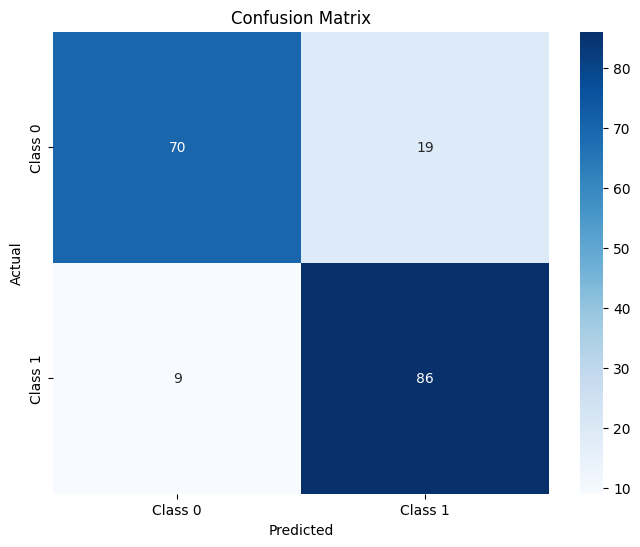

Accuracy: 84.78%
Cross-Validation ROC AUC Score: 93.24%
ROC AUC Score: 84.59%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.83        89
           1       0.82      0.91      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Tuning SVM...
Best Parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation ROC AUC Score for SVM: 92.42%


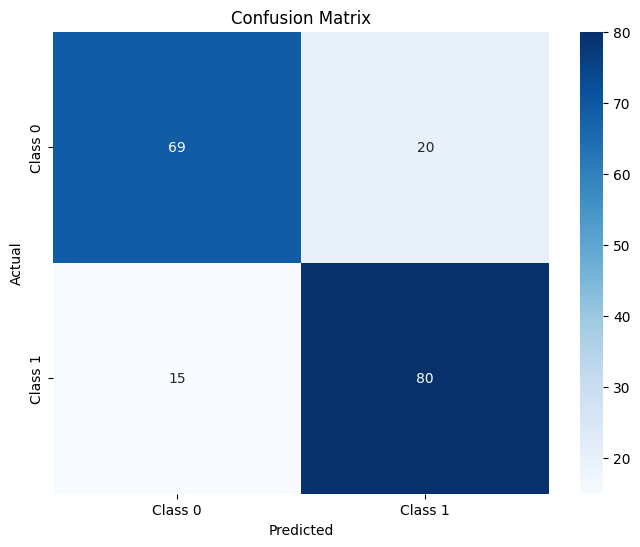

Accuracy: 80.98%
Cross-Validation ROC AUC Score: 92.62%
ROC AUC Score: 80.87%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        89
           1       0.80      0.84      0.82        95

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184

Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation ROC AUC Score for Logistic Regression: 91.19%


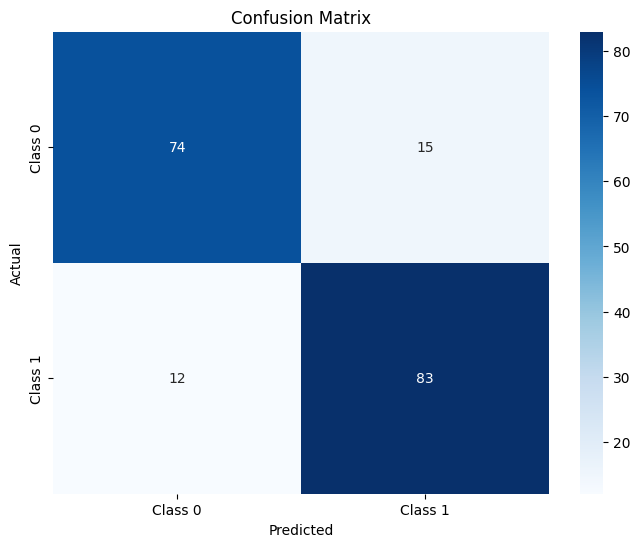

Accuracy: 85.33%
Cross-Validation ROC AUC Score: 91.07%
ROC AUC Score: 85.26%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        89
           1       0.85      0.87      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [ ]:

classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

param_grids = {
    'KNN': {
        'n_neighbors': range(1, 31),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear'],
        'penalty': ['l2']
    }
}

def tune_model(classifier, param_grid, x_train, y_train):
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

def evaluate_model(classifier, x_train, y_train, x_test, y_test):

    classifier.fit(x_train, y_train)


    predictions = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_val_score_mean = np.mean(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc'))
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
    report = classification_report(y_test, predictions)
    print("Accuracy: {:.2%}".format(accuracy))
    print("Cross-Validation ROC AUC Score: {:.2%}".format(cross_val_score_mean))
    print("ROC AUC Score: {:.2%}".format(roc_auc))
    print("\nClassification Report:\n", report)


for name, clf in classifiers.items():
    print(f"Tuning {name}...")
    best_model, best_params, best_cv_score = tune_model(clf, param_grids[name], x_train, y_train)

    print(f"Best Parameters for {name}:", best_params)
    print(f"Best Cross-Validation ROC AUC Score for {name}: {best_cv_score:.2%}")

    evaluate_model(best_model, x_train, y_train, x_test, y_test)


**Random Forest Classifier:**

Best Performing Model: With an accuracy of 84.78% and an ROC AUC score of 93.15%, the Random Forest model demonstrates strong predictive performance on the heart disease dataset. It achieves a balanced precision and recall across both classes, effectively identifying both heart disease and non-heart disease cases. This balance makes it well-suited for medical applications where minimizing both false positives and false negatives is critical. Additionally, the ensemble approach of Random Forest reduces the risk of overfitting, making it a robust choice for heart disease prediction tasks.

**K-Nearest Neighbors (KNN):**

Solid Performance but Sensitive to Dimensionality: KNN achieved a high cross-validation ROC AUC score of 92.68%, with a slightly lower accuracy of 83.15% on the test set. This difference suggests that KNN’s effectiveness may be impacted by the complexity and dimensionality of the dataset. However, its strong performance in detecting heart disease cases (Class 1) indicates that KNN is capable of accurately identifying patients with heart disease. KNN’s sensitivity to data structure may lead to reduced performance in high-dimensional spaces, a limitation when working with complex datasets. The fact that 'kernel': 'rbf' is a better estimator that the linear kernel means that the model learned a more nonlinear decision boundary

**Support Vector Machine (SVM):**

Lower Accuracy, but Competitive ROC AUC: With an accuracy of 80.98% and a cross-validation ROC AUC of 92.42%, the SVC model shows some limitations in overall accuracy while maintaining good predictive power for heart disease cases. The lower accuracy suggests that SVC might have slightly higher false-positive rates for non-heart disease cases (Class 0), potentially flagging some individuals without heart disease as at-risk. This could lead to unnecessary follow-ups in a clinical setting, so SVC may be best used alongside models with higher generalization for both classes.

**Logistic Regression:**



Strong Baseline with High Interpretability: Logistic Regression achieved an accuracy of 85.33% and a balanced ROC AUC of 91.07%, making it a strong baseline model for heart disease prediction. The model’s balanced performance in precision and recall, combined with its interpretability, makes it particularly valuable for clinical use, where understanding the relationship between predictors and outcomes is key. Logistic Regression’s interpretable coefficients allow identification of features most associated with the risk of heart disease, offering insights that clinicians can use for diagnostic purposes.

